In [18]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
dataframe = pd.read_csv("D:/10XAcademy/TelecomUser_DataAnalysis/data/Week1_challenge_data_source.csv")
dataframe.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
print(f" There are {dataframe.shape[0]} rows and {dataframe.shape[1]} columns")

 There are 150001 rows and 55 columns


In [21]:
dataframe.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [22]:
print(f"There are {dataframe.isnull().sum().sum()} null values in the dataframe")

There are 1031392 null values in the dataframe


<AxesSubplot:>

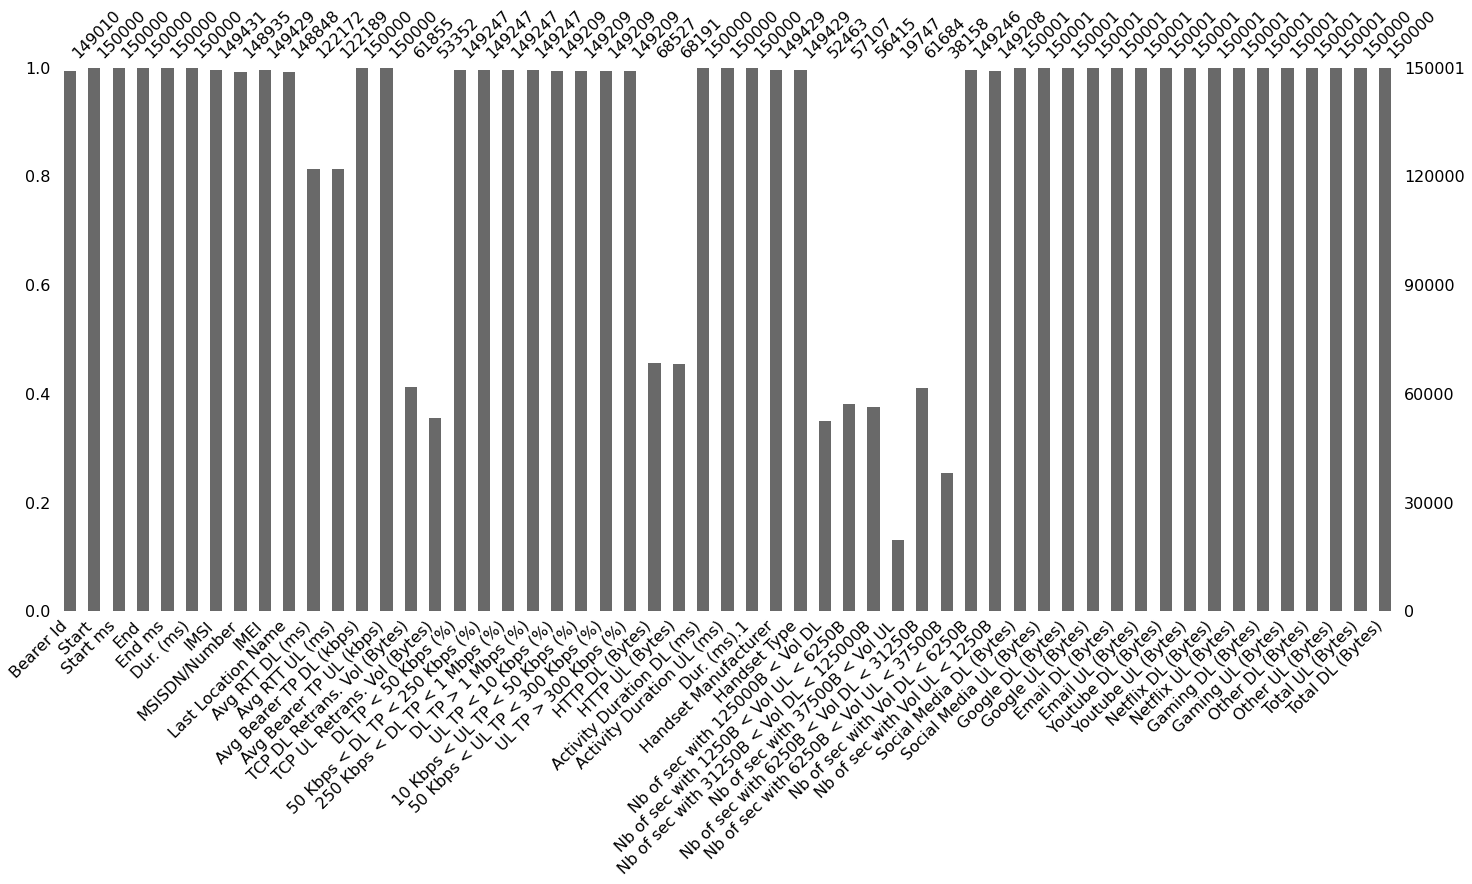

In [23]:
msno.bar(dataframe, labels=list(dataframe.columns))

In [24]:
dataframe.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

<AxesSubplot:>

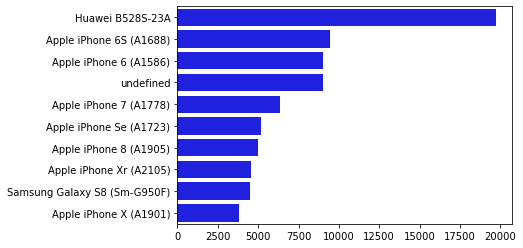

In [25]:
top_ten_handset_values = list(dataframe["Handset Type"].value_counts().index.tolist())[:10]
top_ten_handset_value_counts = list(dataframe["Handset Type"].value_counts())[:10]
sns.barplot(x=top_ten_handset_value_counts,y=top_ten_handset_values, color="b", orient="h")

<AxesSubplot:>

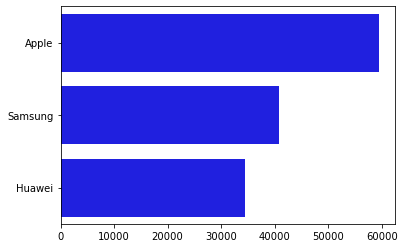

In [26]:
top_3_handset_manuf_values = list(dataframe["Handset Manufacturer"].value_counts().index.tolist())[:3]
top_3_handset_manuf_counts = list(dataframe["Handset Manufacturer"].value_counts())[:3]
sns.barplot(x=top_3_handset_manuf_counts,y=top_3_handset_manuf_values, color="b", orient="h")

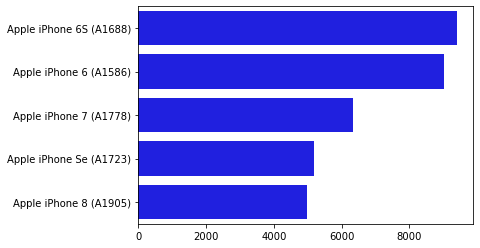

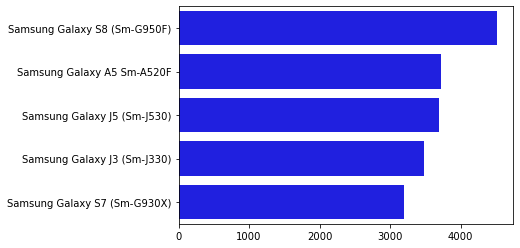

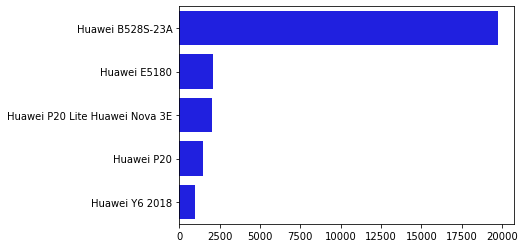

In [27]:
#"Handset Manufacturer","Handset Type"
for manufacturer in top_3_handset_manuf_values:
    manuf_df = dataframe.loc[dataframe["Handset Manufacturer"] == manufacturer]
    manuf_handsets = list(manuf_df["Handset Type"].value_counts().index.tolist())[:5]
    manuf_handsets_values = list(manuf_df["Handset Type"].value_counts())[:5]
    plt.figure()
    sns.barplot(x=manuf_handsets_values,y=manuf_handsets, color="b", orient="h")

<AxesSubplot:xlabel='Bearer Id'>

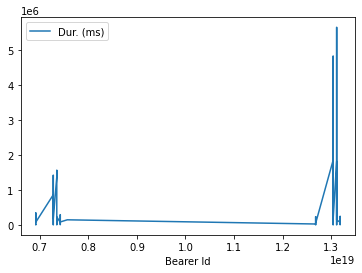

In [28]:
bearer_xDR_sess = dataframe.groupby(["Bearer Id"])
bearer_xDR_dur_df = bearer_xDR_sess.agg({"Dur. (ms)":'sum'})
sns.lineplot(data=bearer_xDR_dur_df, color="b")

<AxesSubplot:ylabel='Bearer Id'>

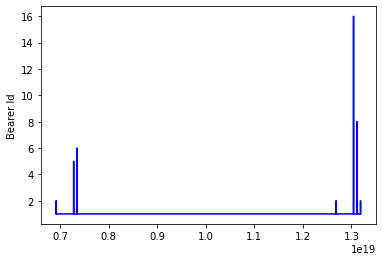

In [33]:
sns.lineplot(data=dataframe["Bearer Id"].value_counts(), color="b")

<AxesSubplot:xlabel='Bearer Id'>

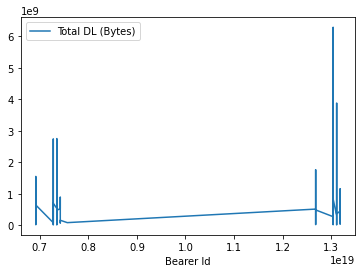

In [34]:
bearer_xDR_sess.agg({"Total DL (Bytes)":'sum'}).sort_values(by=["Total DL (Bytes)"],ascending=False)
sns.lineplot(data=bearer_xDR_sess.agg({"Total DL (Bytes)":'sum'}), color="b")

<AxesSubplot:xlabel='Bearer Id'>

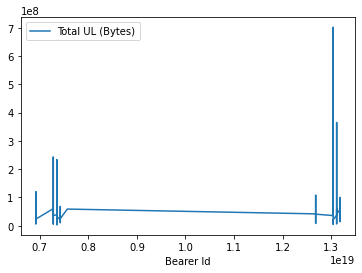

In [35]:
sns.lineplot(data=bearer_xDR_sess.agg({"Total UL (Bytes)":'sum'}), color="b")

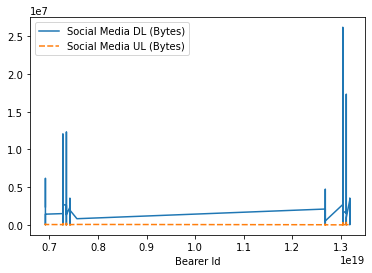

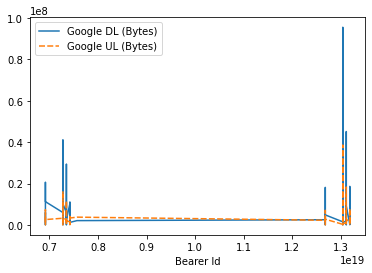

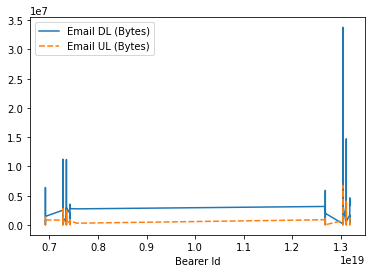

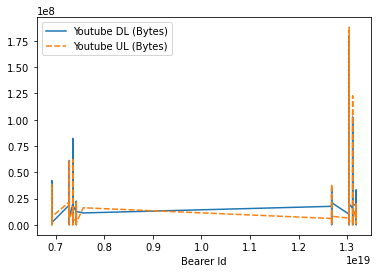

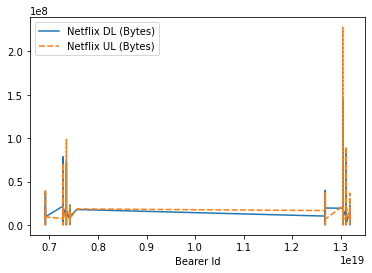

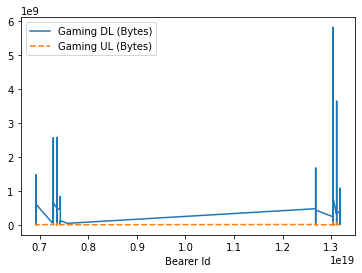

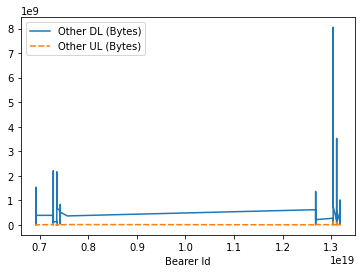

In [36]:
# Get each application column index
applications_df=dataframe.iloc[:,39:53]
applications = list(applications_df.columns)
for app_index in range(len(applications)):
    if app_index % 2==0:
        plt.figure()
        sns.lineplot(data= bearer_xDR_sess.agg({applications[app_index]:'sum',applications[app_index+1]:'sum'}), color="b")